In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class Bandit:
    def __init__(self, m, upper_limit):
        self.m = m
        self.mean = upper_limit
        self.N = 0
        
    def pull(self):
        return np.random.randn() + self.m
        
    def update(self, x):
        self.N += 1
        self.mean = self.mean + 1.0 / self.N * (x - self.mean)

In [3]:
def run_experiment(m1, m2, m3, N, upper_limit=10):
    bandits = [Bandit(m1, upper_limit), Bandit(m2, upper_limit), Bandit(m3, upper_limit)]
    
    data = np.empty(N)
    
    for i in range(N):
        j = np.argmax([b.mean for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)
        
        data[i] = x
        
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
    
    return cumulative_average

In [5]:
c = run_experiment(1.0, 2.0, 3.0, 100000)

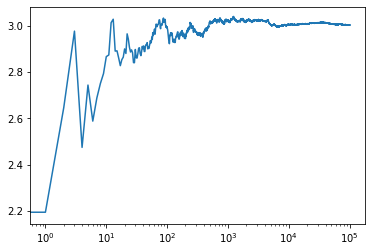

In [6]:
plt.plot(c)
plt.xscale('log')